# Data analisys of databases 'Users' and 'Users_raw'

# Previous preparations

In [36]:
#Import the libraries necesaries for the analisys
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import datetime

In [2]:
#Define the precision of the decimal places to two
pd.set_option("display.precision", 2)

In [3]:
#Read and charge the two data sets
df_users = pd.read_csv("users.csv")
df_users_raw = pd.read_csv("users_raw.csv")

# Data cleaning

## Data validation

### What are the data dimensions?

In [4]:
#Use .shape to find the dimensions of the data sets
print(
    f"Table users: {df_users.shape}\nTable Users_raw: {df_users_raw.shape}"
)

Table users: (16189, 29)
Table Users_raw: (16189, 7)


### What type of data are the variables in the data set?

In [5]:
#Use .dtypes and .value_counts to find the total of data by type of variable in users
df_users.dtypes.value_counts()

float64    15
object     14
dtype: int64

In [6]:
#Use .dtypes and .value_counts to find the total of data by type of variable in users_raw
df_users_raw.dtypes.value_counts()

object     5
int64      1
float64    1
dtype: int64

### How many null observations do we have by type of variable

#### Database 'Users'

The null data in the last columns is around of 93.9% to 99.8%

In [7]:
#Create a dataframe with the number of null values and their percentages in users
null_users = pd.DataFrame(df_users.isna().sum(), columns = ["#"])
null_users["%"] = ((null_users["#"] * 100) / 16189).round(2)
null_users

,#,%
user_id,0,0.00
desired_state,0,0.00
last_role,21,0.13
dreamt_companies,0,0.00
forms_to_work,0,0.00
benefits_sought,0,0.00
my_languages,0,0.00
last_study,0,0.00
level_last_study,117,0.72
interested_areas,0,0.00


In [8]:
#list of columns names with much null data in users
del_col_u = list(df_users.isna().sum().sort_values(ascending = False).head(14).index)

#### Database 'Users_raw'

The null data in the columns is around of 0.01% to 3.9%

In [9]:
#Create a dataframe with the number of null values and their percentages in users_raw
null_users_raw = pd.DataFrame(df_users_raw.isna().sum(), columns = ["#"])
null_users_raw["%"] = ((null_users_raw["#"] * 100) / 16189).round(2)
null_users_raw

,#,%
id,0,0.00
created_at,1,0.01
birthdate,406,2.51
gender,641,3.96
city,311,1.92
state,337,2.08
profile_completed,0,0.00


In [10]:
#list of rows index with much null data in users del_row_ur list()
a = df_users_raw.isna().any(axis=1)
del_row_ur = list(df_users_raw[a].index)

## Counts and proportions

### Statistics that describe the dataset in general terms

In [11]:
#Use .describe to understand the distribution of the data in Users
df_users.describe(include = "all")

,user_id,desired_state,last_role,dreamt_companies,forms_to_work,benefits_sought,my_languages,last_study,level_last_study,interested_areas,...,views_to_resume_received,views_to_profile_received,saved_from_playlist,reactions_received,average_feedback,selector_appearances,reactiones_made,match_with_playlists,contents_viewed,connections_sent
count,1.62e+04,16189,16168,16189,16189,16189,16189,16189,16072,16189,...,268.00,743.00,295.00,105.00,77.00,982.00,67.00,25.0,80.00,461.00
unique,NaN,5,10249,8417,105,7348,641,6947,11,11792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,employment,Estudiante,[],[],[],"[['EN', 'intermediate', None]]",Ingeniería de Sistemas,undergraduate,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,9832,443,6621,4998,5422,3621,445,7195,3067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.58e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.01,3.14,2.23,1.07,3.92,1.52,3.63,3.6,1.76,2.87
std,3.03e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.12,4.16,2.01,0.29,1.00,1.27,6.69,3.3,2.18,18.71
min,1.00e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00
25%,8.12e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.00,1.00,1.00,1.00,3.50,1.00,1.00,1.0,1.00,1.00
50%,9.95e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.00,2.00,1.00,1.00,4.11,1.00,1.00,2.0,1.00,2.00
75%,1.33e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.00,3.00,3.00,1.00,4.67,2.00,3.00,6.0,2.00,2.00


In [12]:
#Use .describe to understand the distribution of the data in Users_raw
df_users_raw.describe(include = "all")

,id,created_at,birthdate,gender,city,state,profile_completed
count,1.62e+04,16188,15783,15548,15878,15852,16189.00
unique,NaN,16130,8179,4,601,137,NaN
top,NaN,2019-10-07 09:57:16,1998-11-03,M,Bogotá,Cundinamarca,NaN
freq,NaN,6,10,10487,5285,6196,NaN
mean,1.58e+05,NaN,NaN,NaN,NaN,NaN,75.56
std,3.03e+05,NaN,NaN,NaN,NaN,NaN,24.36
min,1.00e+00,NaN,NaN,NaN,NaN,NaN,13.00
25%,8.12e+04,NaN,NaN,NaN,NaN,NaN,52.00
50%,9.95e+04,NaN,NaN,NaN,NaN,NaN,86.00
75%,1.33e+05,NaN,NaN,NaN,NaN,NaN,98.00


## What is the proportion of null data for each variable

### Database 'Users'

<Axes: >

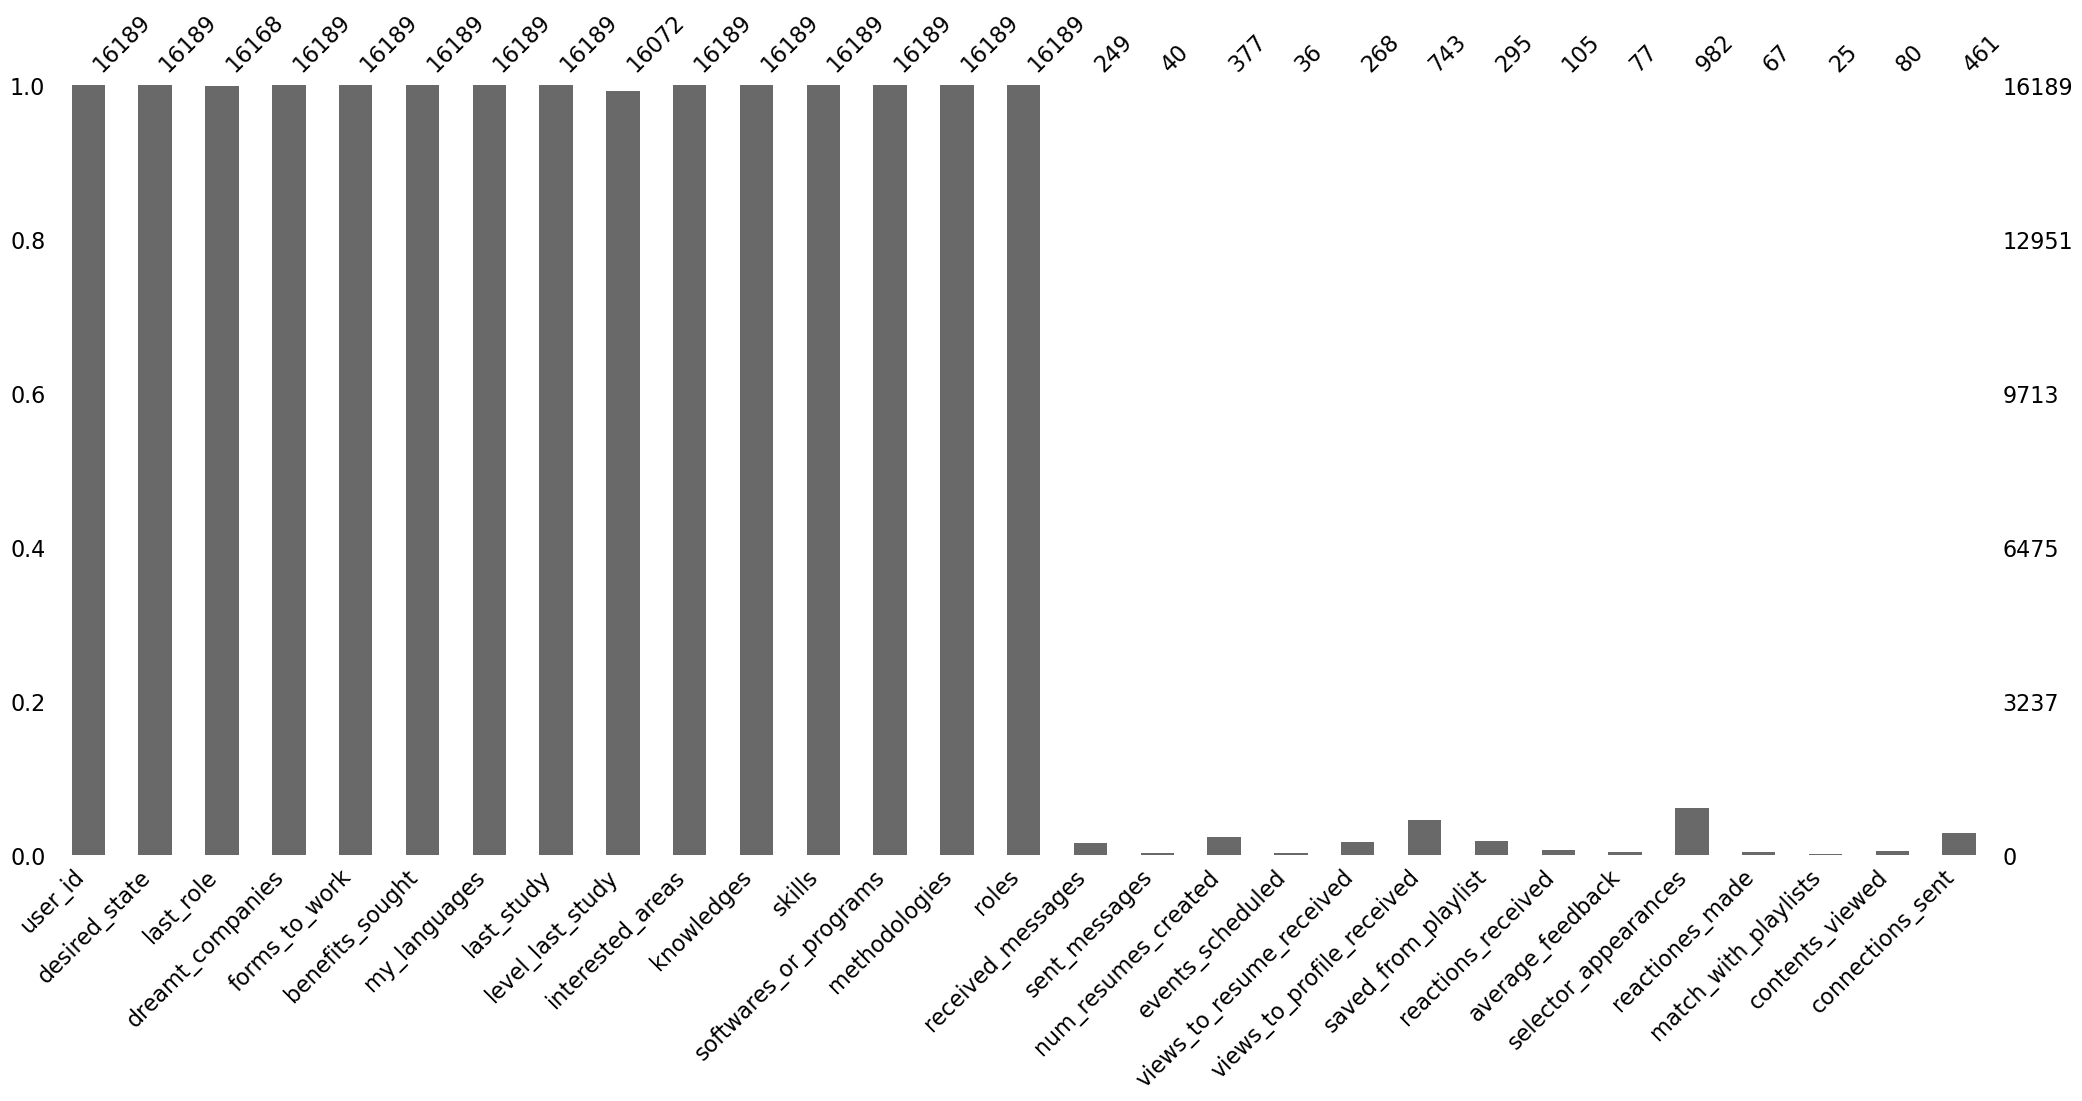

In [13]:
msno.bar(df_users)

<Axes: >

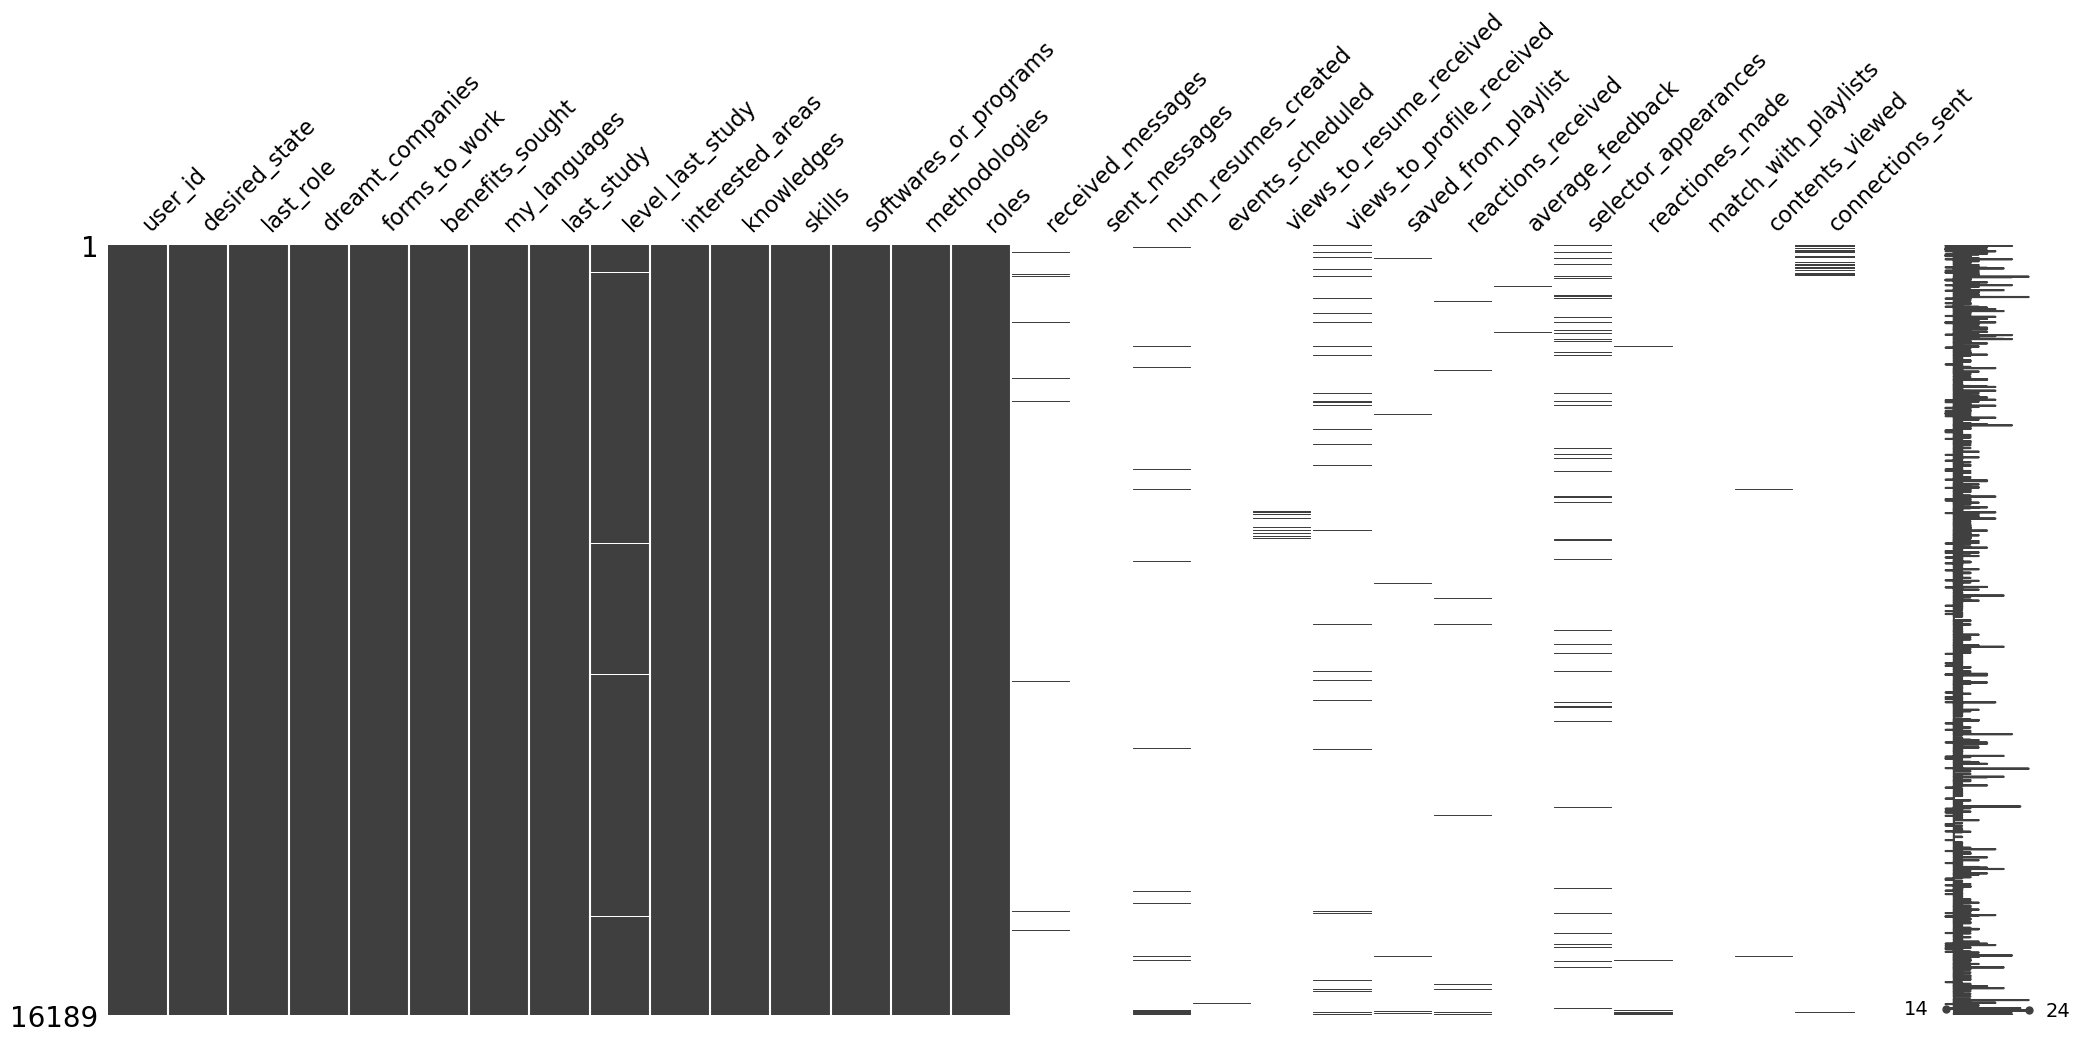

In [14]:
msno.matrix(df_users)

### Database 'Users_raw'

<Axes: >

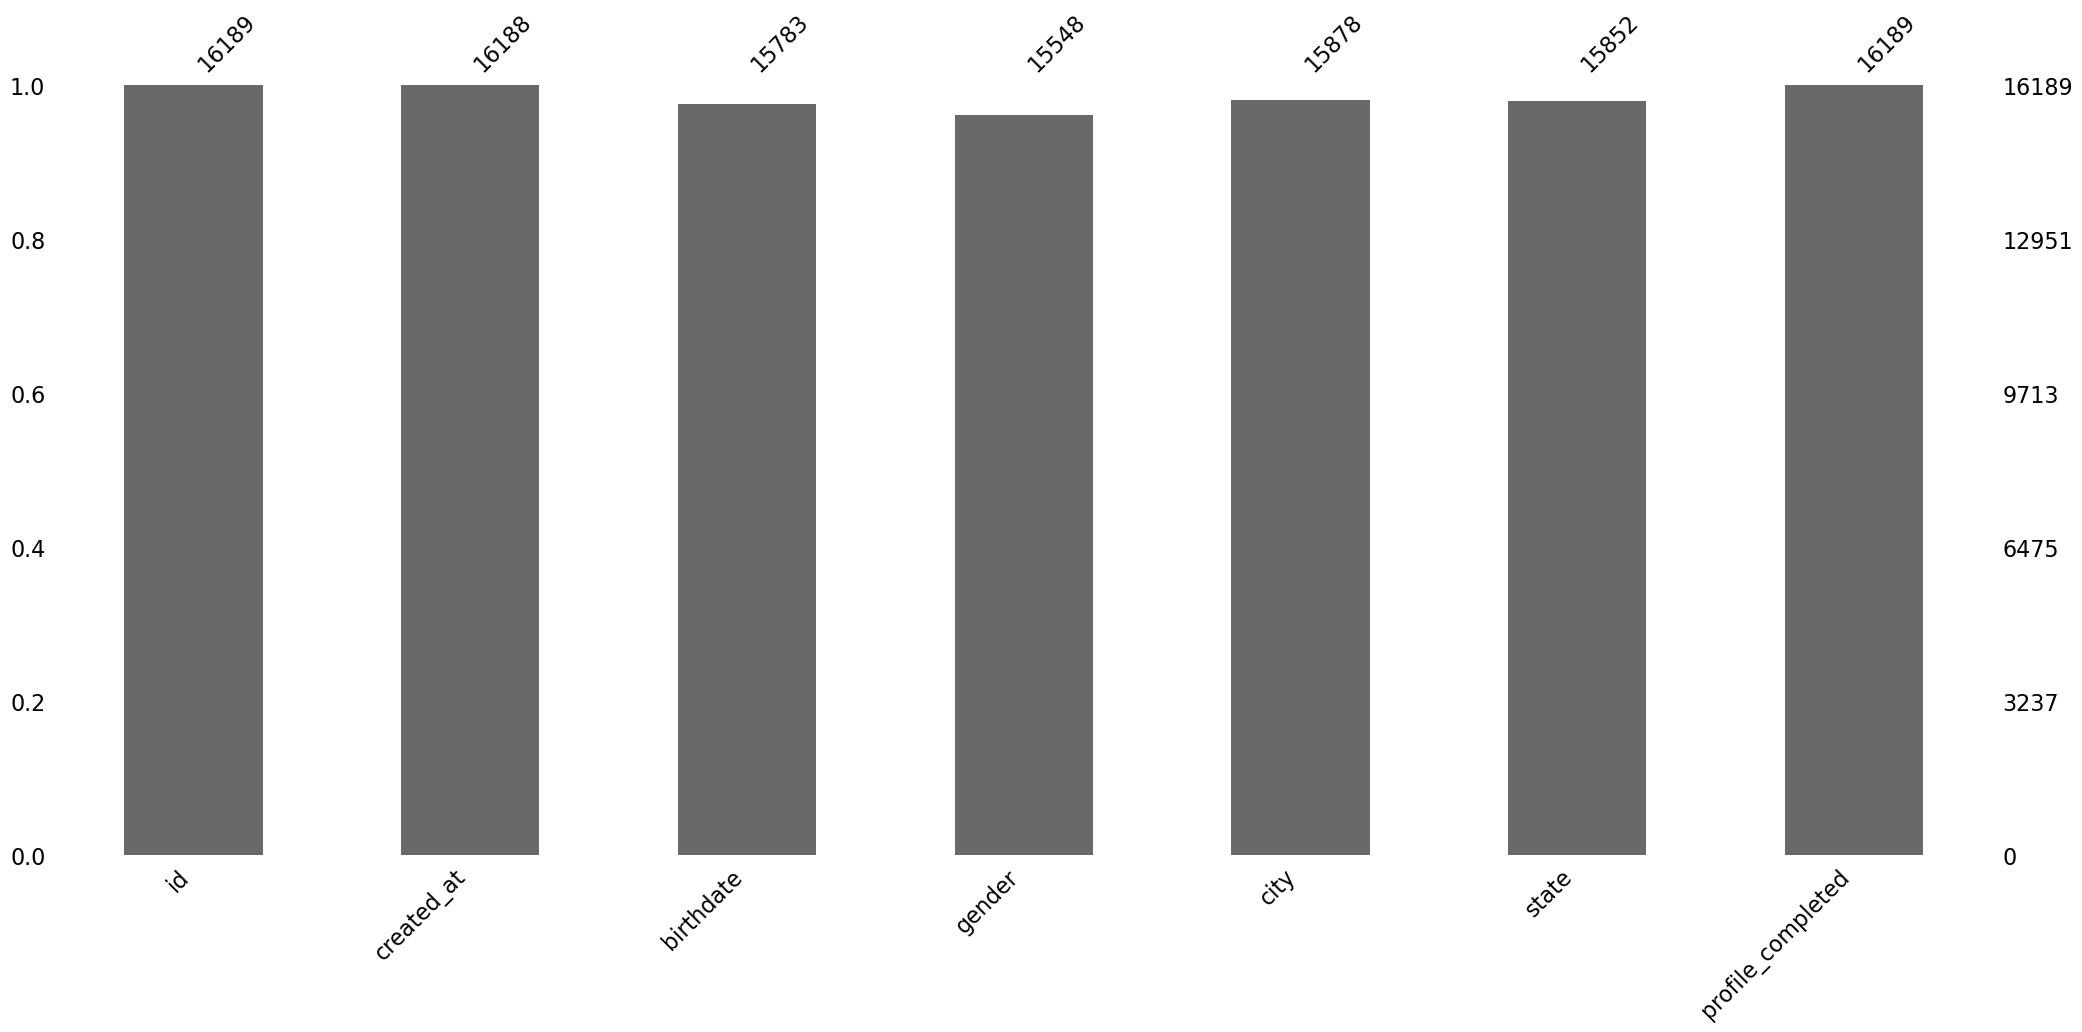

In [15]:
msno.bar(df_users_raw)

<Axes: >

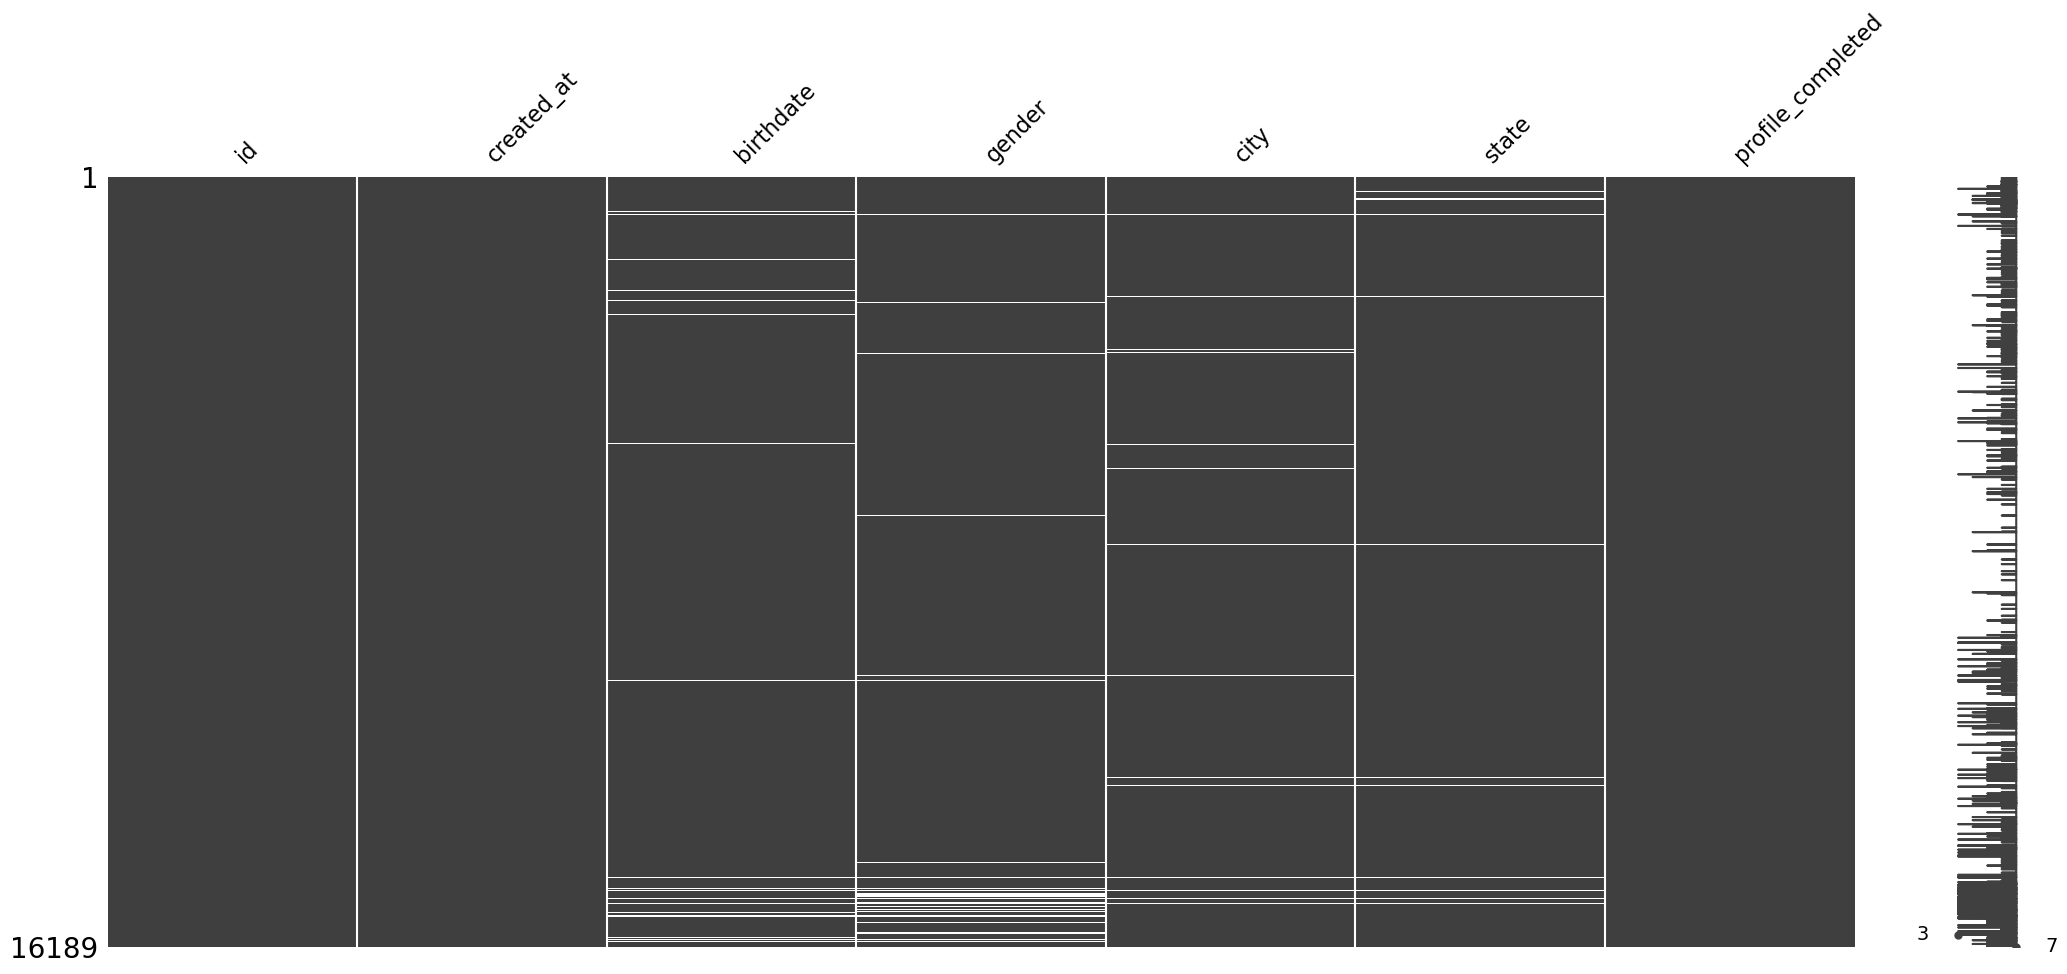

In [16]:
msno.matrix(df_users_raw)

### join the databases

In [17]:
#Use .merge to join the two databases, the join used is left.
df_usr_comp = pd.merge(df_users, df_users_raw, left_on = "user_id", right_on = "id", how = "left")
df_usr_comp = df_usr_comp.drop("id", axis = 1)

## Cleaning null data

### Columns with much null data of database Users

In [18]:
#df_usr_comp = df_usr_comp.drop(del_col_u, axis = 1)

### Rows with some null data of database Users_row

In [19]:
#df_usr_comp = df_usr_comp.drop(del_row_ur)

### Change the type of data

In [20]:
#columns_float = list(df_users.select_dtypes('float64').columns)

#for i in columns_float:
#    df_users[i] = df_users[i].astype(int)

# Insight discovery

## Profile completion rate over time

In [21]:
#Change the type of data of the column 'User_id'
df_usr_comp["user_id"] = df_usr_comp["user_id"].astype(int)

In [22]:
table_1 = df_usr_comp[["user_id", "created_at", "profile_completed"]]
table_1 = table_1.sort_values(["created_at", "user_id"])
table_1

,user_id,created_at,profile_completed
0,1,2016-01-07 18:10:23,96.0
19,12,2016-01-07 18:10:23,100.0
847,112,2016-01-18 17:28:56,84.0
7,121,2016-01-18 17:28:57,100.0
201,169,2016-01-18 17:29:03,90.0
...,...,...,...
16185,1957347,2023-04-15 09:36:45,52.0
16186,1957363,2023-04-15 16:03:38,51.0
16187,1957391,2023-04-17 12:23:43,44.0
16188,1957403,2023-04-17 16:53:22,41.0


## Top 5 roles with the highest average_feedback by gender

In [59]:
table_2 = df_usr_comp[["user_id", "roles", "average_feedback", "gender"]]
table_2 = table_2.pivot_table(index = ["gender", "roles"], values = "average_feedback", aggfunc = "mean").sort_values(["gender","average_feedback"], ascending = False)
table_2_limited = table_2.groupby(level=0).head(5)
table_2_limited

average_feedback
gender roles                                                               
M      ['Consultor  Empaques ecológicos']                              5.00
       ['Consultor BI - DDDM Process']                                 5.00
       ['Desarrollador Front-end']                                     5.00
       ['Desarrollador Junior']                                        5.00
       ['Desarrollador de software', 'Desarrollador Ju...              5.00
F      ['Más prueba', 'Diseñadora UX']                                 5.00
       ['CEO en una empresa Legaltech']                                4.75
       ['Coordinador/Líder de Sistemas de Gestión Inte...              4.75
       ['Desarrolladora web junior']                                   4.67
       []                                                              4.62

## Age for last study

In [69]:
df_usr_comp["birthdate"] = pd.to_datetime(df_usr_comp["birthdate"])
df_usr_comp["age"] = ((datetime.today() - df_usr_comp["birthdate"]).dt.days / 365.25).round(0)

table_3 = df_usr_comp[["user_id", "last_study", "interested_areas", "age"]]
table_3

,user_id,last_study,interested_areas,age
0,1,Ingeniería de Sistemas,"['Calidad de Software', 'Formación', 'Tecnolog...",44.0
1,9670,Tecnología en sistemas electromecánicos,"['Física', 'Diseño', 'Ecología', 'Tecnología',...",25.0
2,23825,Bioingeniería,"['Starups', 'Marketing Digital Móvil', 'Progra...",38.0
3,2245,Ingeniería de Sistemas,"['Desarrollo de software', 'asf;aslkf;aslkfa;s...",31.0
4,24328,Gestión Del Diseño Gráfico,"['Diseño gráfico', 'Mercadeo', 'marketing digi...",22.0
...,...,...,...,...
16184,1957325,Ingeniería de Producción,"['Operaciones Y Logística', 'Tecnología', 'Adm...",NaN
16185,1957347,Diseño industrial,"['Diseño', 'Diseño Grafico', 'Experiencia de...",26.0
16186,1957363,Periodismo,"['Investigación', 'Comunicación Organizacional...",NaN
16187,1957391,Diseño gráfico,"['Diseño Grafico', 'Ilustración', 'Redes Soci...",NaN


# Visualization

### Scatter plot of age vs. average_feedback

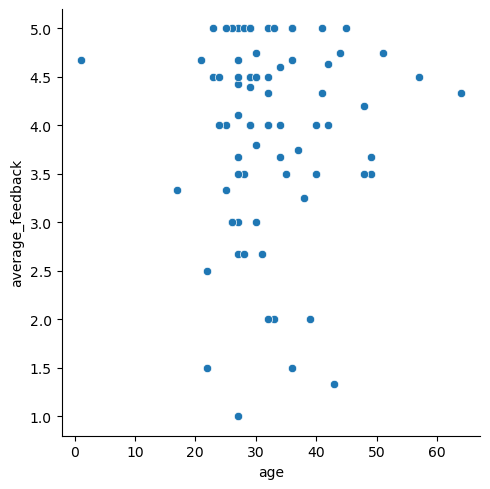

In [45]:
sns.relplot(
    data = df_usr_comp, x = "age", y = "average_feedback",
    kind = 'scatter'
)
plt.show()

### Scatter plot of views_to_resume_received vs. reactions_received, colored by profile_completed.

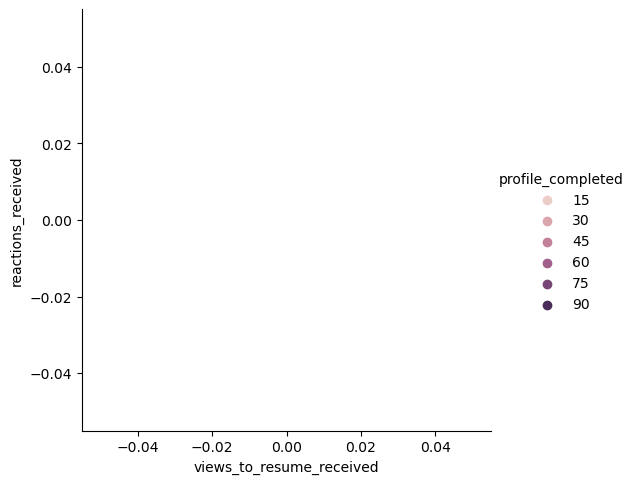

In [49]:
sns.relplot(
    data = df_usr_comp, x = "views_to_resume_received", y = "reactions_received",
    hue = "profile_completed", kind = 'scatter'
)
plt.show()

### Histogram plot of the distribution of age segmented by last level of study.

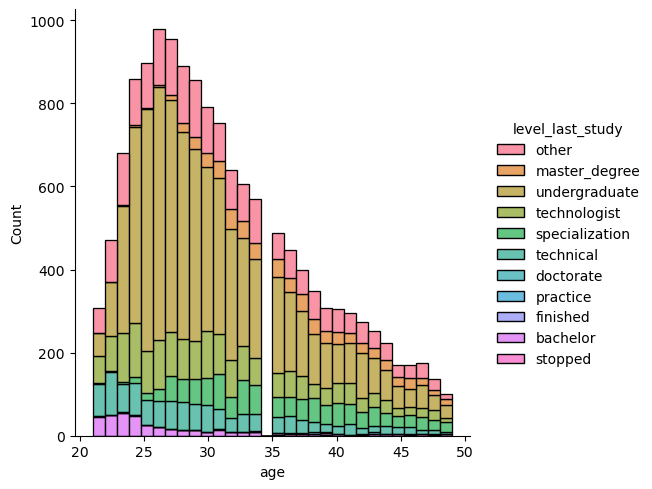

In [91]:
lower_bound = df_usr_comp["age"].quantile(0.05)
upper_bound = df_usr_comp["age"].quantile(0.95)

# Filter the values into the range
data_1 = df_usr_comp.loc[(df_usr_comp["age"] >= lower_bound) & (df_usr_comp["age"] <= upper_bound)]

sns.displot(
    data = data_1, x = "age", bins = 30,
    hue = "level_last_study", multiple="stack"
)

plt.show()

## Conclusions

La información recibida en los .csv Users y Users raw contiene las siguientes particularidades:

- En Users la gran falta de registros en las últimas columnas indica una falta de interacción por parte de los usuarios, ya sea por interés o porque no entienden la mecánica de funcionamiento, es necesario evaluar a nivel de usabilidad que mejoras se pueden implementar para incentivar la interacción o descartar estos datos.
- En Users se pueden encontrar columnas con datos que son listas, multiples campos se encuentran con información incompleta, como sugerencia desde la realización del formulario los campos deberían ser segmentados para que no se entreguen en listas y poner un límite número de datos ingresados, muchas veces los usuarios tienden a rellenar campos con información poco util, o se sienten fatigados después de estar llenando multiples campos y a posterior simplemente dejan los datos incompletos por el agotamiento de diligenciarlos, haciendo esto se ahorraría tiempo en la limpieza de datos.
- En datos de vital importancia, desde el formulario hay que implementar medidas que aseguren que no se acepten datos vavacíos

En mi primeriza concepción de la recolección de datos es necesario implementar nuevas mejoras para solucionar estos problemas.